In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

# 10.1.3 Example: The univariate Gaussian

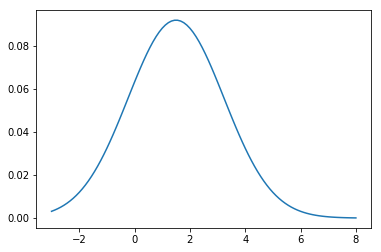

In [17]:
N = 100
mean = 1.5
sigma = 3
x = np.random.normal(mean, sigma, N).reshape(-1,1)
t = np.linspace(-3,8,N).reshape(-1,1)
p = 1/(2*np.pi*np.sqrt(sigma))*np.exp(-.5*(t-mean)**2/sigma)
plt.figure()
plt.plot(t, p)

# variational inference
mu0 = a0 = b0 = lambd0 = 0
mu = (lambd0*mu0 + N*x.mean())/(lambd0 + N)
a = a0 + N/2
lambd = 1
max_iter = 100
for i in range(max_iter):
    b = b0 + .5*((lambd0+N)*(1/lambd + mu**2) - 2*(lambd0*mu0 + x.sum())*mu +np.sum(x**2) + lambd0*mu0**2)
    lambd = (lambd0 + N) * a / b

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  


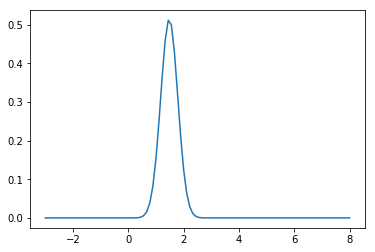

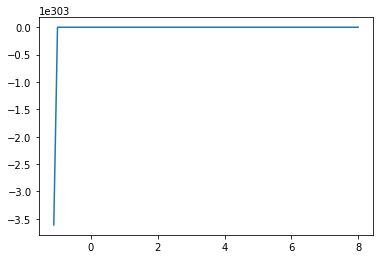

In [18]:
def gam(lambd, a, b):
    p = 1/gamma(a)*b**a*lambd**(a-1)*np.exp(-b*lambd)
    return p

plt.figure()
plt.plot(t, 1/(2*np.pi*np.sqrt(1/lambd))*np.exp(-.5*(t-mu)**2*lambd))
plt.figure()
plt.plot(t, gam(t, a, b))

# 10.3 Variational Linear Regression

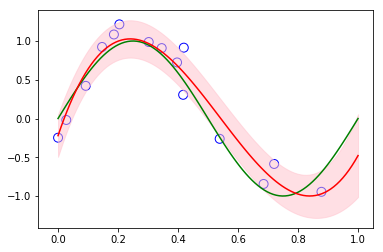

In [20]:
def polynomial(x, M):
    n = x.shape[0]
    x_poly = np.zeros([n,M])
    for i in range(M):
        x_poly[:,i] = x.reshape(-1)**i
    return x_poly
np.random.seed(1)
N = 15
t = np.linspace(0,1,100).reshape(-1,1)
yt = np.sin(2*np.pi*t)
plt.figure()
plt.plot(t, yt,c='green')

beta = 1/0.05
x = np.random.uniform(0,1,N).reshape(-1,1)
y = np.sin(2*np.pi*x) + np.random.normal(0, np.sqrt(1/beta), [N,1])
plt.scatter(x,y,marker='o', edgecolors='blue', s=80, c='')

M = 4
x_train = polynomial(x, M)
max_iter = 500
b = b0 = a0 = 1
a = a0 + .5*M
for i in range(max_iter):
    SN = np.linalg.inv(a/b*np.eye(M) + beta*x_train.T@x_train)
    mN = beta*SN@x_train.T@y
    b = b0 + .5*(mN.T@mN + np.trace(SN))
    
x_test = polynomial(t, M)
yt = x_test@mN
sigma = 1/beta + np.diag(x_test @ SN @ x_test.T)
plt.plot(t,yt,c='red')
plt.fill_between(t.flatten(), yt.flatten() - np.sqrt(sigma).flatten(), yt.flatten() + np.sqrt(sigma).flatten(),color="pink", label="std.", alpha=0.5)

# 10.6 Variational Logistic Regression

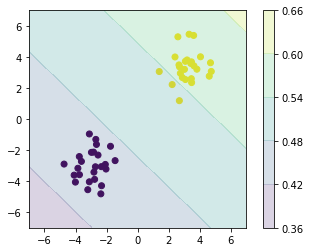

In [21]:
x0 = np.random.normal(size=50).reshape(-1, 2) - 3.
x1 = np.random.normal(size=50).reshape(-1, 2) + 3.
x_train =  np.concatenate([x0, x1])
y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int).reshape(-1,1)
plt.figure()
plt.scatter(x_train[:,0], x_train[:,1], c=y_train.flatten())
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.gca().set_aspect('equal', adjustable='box')

# variational logistic regression
n, d = x_train.shape
a0 = b0 = 1
xi = np.random.uniform(-1,1,n)
max_iter = 100
a = a0 + .5 * d
b = b0
alpha = a/b

for i in range(max_iter):
    lambda_ = np.tanh(xi) * .25 / xi
    Sn = np.linalg.inv(np.eye(d)/alpha + 2 * (lambda_ * x_train.T) @ x_train)
    mean = Sn@(x_train.T@(y_train - 0.5))
    
    b = b0 + .5*(np.sum(mean**2) + np.trace(Sn))
    alpha = a/b
    xi = np.sqrt(np.trace(x_train@(Sn+mean@mean.T)@x_train.T))
    
x0, x1 = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
x_test = np.array([x0, x1]).reshape(2, -1).T

mu_a = x_test @ mean
sigma = np.trace(x_test @ Sn @ x_test.T)
y = 1/(1+np.exp(-(mu_a / np.sqrt(1 + np.pi * sigma / 8))))

# plt.contourf(x0, x1, y.reshape(100,100), np.array([0., 0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1.]), alpha=0.2)
plt.contourf(x0, x1, y.reshape(100,100), 3, alpha=0.2)
plt.colorbar()
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.gca().set_aspect('equal', adjustable='box')